# <b>НАЧАЛО</b>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [3]:
data = pd.read_csv('./dataset.csv')

<h1>Расшифровка колонок:</h1>


<b>track_id</b>: идентификатор Spotify для трека

<b>artists</b>: Имена исполнителей, которые выполнили трек. Если исполнителей больше одного, они разделены точкой с запятой

<b>album_name</b>: Название альбома, в котором появляется трек

<b>track_name</b>: Название трека

<b>popularity</b>: Популярность трека — это значение между 0 и 100, где 100 — самая популярная. Популярность рассчитывается алгоритмом и в основном зависит от общего количества прослушиваний трека и того, насколько эти прослушивания недавние. В общем, песни, которые сейчас слушают много, будут иметь более высокую популярность, чем песни, которые слушали много в прошлом. Дублирующиеся треки (например, один и тот же трек из сингла и альбома) оцениваются независимо. Популярность артиста и альбома выводится математически из популярности трека

<b>duration_ms</b>: Длительность трека в миллисекундах

<b>explicit</b>: Содержит ли трек откровенную лирику (true = да; false = нет или неизвестно)

<b>danceability</b>: Танцевальность описывает, насколько трек подходит для танцев на основе комбинации музыкальных элементов, включая темп, стабильность ритма, силу бита и общую регулярность. Значение 0.0 — наименее танцевальный, 1.0 — наиболее танцевальный

<b>energy</b>: Энергия — это мера от 0.0 до 1.0 и представляет собой воспринимаемую меру интенсивности и активности. Обычно энергичные треки кажутся быстрыми, громкими и шумными. Например, дэт-метал имеет высокую энергию, тогда как прелюдия Баха получает низкий балл по шкале

<b>key</b>: Ключ, в котором находится трек. Целые числа соответствуют высотам звука с использованием стандартной нотации класса высоты. Например, 0 = C, 1 = C♯/D♭, 2 = D и так далее. Если ключ не был обнаружен, значение равно -1

<b>loudness</b>: Общая громкость трека в децибелах (дБ)

<b>mode</b>: Режим указывает модальность (мажор или минор) трека, тип масштаба, из которого происходит его мелодическое содержание. Мажор представлен 1, минор — 0

<b>speechiness</b>: Речевитость обнаруживает наличие разговорных слов в треке. Чем больше трек похож на речь (например, ток-шоу, аудиокнига, поэзия), тем ближе к 1.0 значение атрибута. Значения выше 0.66 описывают треки, которые, вероятно, полностью состоят из разговорных слов. Значения между 0.33 и 0.66 описывают треки, которые могут содержать как музыку, так и речь, либо в разделах, либо в слоях, включая такие случаи, как рэп-музыка. Значения ниже 0.33, скорее всего, представляют музыку и другие неречевые треки

<b>acousticness</b>: Мера уверенности от 0.0 до 1.0 в том, является ли трек акустическим. 1.0 представляет высокую уверенность в том, что трек акустический

<b>instrumentalness</b>: Предсказывает, содержит ли трек вокал. Звуки "оох" и "аах" рассматриваются как инструментальные в этом контексте. Рэп или спич-треки явно "вокальные". Чем ближе значение инструментальности к 1.0, тем выше вероятность, что трек не содержит вокала

<b>liveness</b>: Обнаруживает наличие аудитории в записи. Более высокие значения живучести представляют увеличенную вероятность того, что трек был исполнен вживую. Значение выше 0.8 обеспечивает высокую вероятность того, что трек живой

<b>valence</b>: Мера от 0.0 до 1.0, описывающая музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно (например, счастливо, радостно, эйфорично), тогда как треки с низкой валентностью звучат более негативно (например, грустно, подавленно, зло)

<b>tempo</b>: Общая оценка темпа трека в ударах в минуту (BPM). В музыкальной терминологии темп — это скорость или темп данного произведения и происходит непосредственно от средней длительности удара

<b>time_signature</b>: Оценка размера. Размер (метр) — это нотационное соглашение для указания количества ударов в каждом такте (или мере). Размер варьируется от 3 до 7, указывая размеры от 3/4 до 7/4

<b>track_genre</b>: Жанр, к которому принадлежит трек

In [4]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
# сколько раз встречаюстя разные значения popularity
data['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
96         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

In [7]:
# осмотр возможных значений колонки popularity
sorted(data['popularity'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [8]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
# так как в датасете всего 3 пропущенных значения, то строки где они встречаются можно убрать
data = data.dropna()

In [10]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# <b>АНАЛИТИКА</b>

### Корреляция

In [11]:
from sklearn.preprocessing import LabelEncoder

# Создаем копию DataFrame data и сохраняем её в переменную df
# Это позволяет нам избежать изменения оригинального DataFrame data
df = data.copy()


# Исследуем df и вносим изменения
# В df изменяем все колонки типа object и bool

# Выбираем все столбцы с типом данных 'object' или 'bool'
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns


# Преобразуем категориальные данные в числовые и заменяем их в df
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder();
    df[col] = le.fit_transform(df[col]);
    label_encoders[col] = le;

df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,62845,10357,8100,11741,73,230666,0,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,1,55667,3287,14796,22528,55,149610,0,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,2,19766,12397,39162,60774,57,210826,0,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,3,77941,14839,8580,9580,71,201933,0,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,4,68241,5255,16899,25689,82,198853,0,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0


In [12]:
#корреляция
df.corr()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
Unnamed: 0,1.000000,-0.003860,-0.008465,0.003699,0.001846,0.032146,-0.032738,-0.054735,0.003445,-0.055993,...,-0.027307,0.005110,-0.084952,0.076837,-0.070285,0.033641,0.053109,-0.025825,-0.021115,0.999929
track_id,-0.003860,1.000000,0.003159,0.007114,0.005537,0.003230,-0.002966,0.004160,-0.000231,-0.000498,...,0.001657,-0.006396,-0.000465,0.001348,-0.000126,-0.003256,0.001770,-0.008131,-0.003742,-0.003890
artists,-0.008465,0.003159,1.000000,0.090176,0.038936,0.003636,-0.021576,-0.004677,-0.009925,-0.005582,...,-0.018846,-0.002974,-0.016229,-0.004218,0.016069,-0.007987,0.001019,0.001168,-0.008208,-0.008688
album_name,0.003699,0.007114,0.090176,1.000000,0.303307,0.042501,0.006693,0.000371,-0.019166,-0.044731,...,-0.032242,-0.000449,-0.013397,0.033419,0.001301,-0.027714,-0.041702,-0.003290,-0.001226,0.003505
track_name,0.001846,0.005537,0.038936,0.303307,1.000000,0.011935,0.004156,-0.005846,-0.020867,-0.039642,...,-0.012525,0.006095,-0.025665,0.035877,-0.024621,-0.005675,-0.016551,0.005582,-0.002536,0.001860
popularity,0.032146,0.003230,0.003636,0.042501,0.011935,1.000000,-0.007129,0.044078,0.035444,0.001053,...,0.050420,-0.013948,-0.044930,-0.025458,-0.095147,-0.005397,-0.040522,0.013212,0.031076,0.032696
duration_ms,-0.032738,-0.002966,-0.021576,0.006693,0.004156,-0.007129,1.000000,-0.065270,-0.073435,0.058520,...,-0.003475,-0.035581,-0.062605,-0.103770,0.124364,0.010308,-0.154464,0.024356,0.018229,-0.032822
explicit,-0.054735,0.004160,-0.004677,0.000371,-0.005846,0.044078,-0.065270,1.000000,0.122506,0.096954,...,0.108587,-0.037216,0.307951,-0.094400,-0.103405,0.032547,-0.003378,-0.002815,0.038387,-0.054827
danceability,0.003445,-0.000231,-0.009925,-0.019166,-0.020867,0.035444,-0.073435,0.122506,1.000000,0.134325,...,0.259076,-0.069224,0.108625,-0.171531,-0.185608,-0.131620,0.477347,-0.050448,0.207219,0.003570
energy,-0.055993,-0.000498,-0.005582,-0.044731,-0.039642,0.001053,0.058520,0.096954,0.134325,1.000000,...,0.761690,-0.078365,0.142508,-0.733908,-0.181880,0.184795,0.258937,0.247852,0.187127,-0.056175


Номер песни в csv файле почему-то очень сильно коррелирует с жанром(0.9999).

Оказалось файл просто отсортирован так, что сначала идет один жанр потом другой.

В любом случае unnamed0 надо будет удалить, так как это всего лишь номер строки.

In [13]:
# убираю unnamed0
df = df.drop(df.columns[0], axis=1)

# и снова делаю корреляцию
df.corr()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
track_id,1.000000,0.003159,0.007114,0.005537,0.003230,-0.002966,0.004160,-0.000231,-0.000498,-0.003045,0.001657,-0.006396,-0.000465,0.001348,-0.000126,-0.003256,0.001770,-0.008131,-0.003742,-0.003890
artists,0.003159,1.000000,0.090176,0.038936,0.003636,-0.021576,-0.004677,-0.009925,-0.005582,0.006619,-0.018846,-0.002974,-0.016229,-0.004218,0.016069,-0.007987,0.001019,0.001168,-0.008208,-0.008688
album_name,0.007114,0.090176,1.000000,0.303307,0.042501,0.006693,0.000371,-0.019166,-0.044731,-0.006886,-0.032242,-0.000449,-0.013397,0.033419,0.001301,-0.027714,-0.041702,-0.003290,-0.001226,0.003505
track_name,0.005537,0.038936,0.303307,1.000000,0.011935,0.004156,-0.005846,-0.020867,-0.039642,-0.003909,-0.012525,0.006095,-0.025665,0.035877,-0.024621,-0.005675,-0.016551,0.005582,-0.002536,0.001860
popularity,0.003230,0.003636,0.042501,0.011935,1.000000,-0.007129,0.044078,0.035444,0.001053,-0.003847,0.050420,-0.013948,-0.044930,-0.025458,-0.095147,-0.005397,-0.040522,0.013212,0.031076,0.032696
duration_ms,-0.002966,-0.021576,0.006693,0.004156,-0.007129,1.000000,-0.065270,-0.073435,0.058520,0.008123,-0.003475,-0.035581,-0.062605,-0.103770,0.124364,0.010308,-0.154464,0.024356,0.018229,-0.032822
explicit,0.004160,-0.004677,0.000371,-0.005846,0.044078,-0.065270,1.000000,0.122506,0.096954,0.004485,0.108587,-0.037216,0.307951,-0.094400,-0.103405,0.032547,-0.003378,-0.002815,0.038387,-0.054827
danceability,-0.000231,-0.009925,-0.019166,-0.020867,0.035444,-0.073435,0.122506,1.000000,0.134325,0.036470,0.259076,-0.069224,0.108625,-0.171531,-0.185608,-0.131620,0.477347,-0.050448,0.207219,0.003570
energy,-0.000498,-0.005582,-0.044731,-0.039642,0.001053,0.058520,0.096954,0.134325,1.000000,0.048007,0.761690,-0.078365,0.142508,-0.733908,-0.181880,0.184795,0.258937,0.247852,0.187127,-0.056175
key,-0.003045,0.006619,-0.006886,-0.003909,-0.003847,0.008123,0.004485,0.036470,0.048007,1.000000,0.038591,-0.135911,0.020419,-0.040942,-0.006821,-0.001597,0.034099,0.010914,0.015064,-0.005509



<h1>Выводы по корреляции:</h1>
<ol>
<li>
<b>Сильные корреляции:</b>

loudness и energy: коэффициент корреляции 0.761690, что указывает на сильную положительную корреляцию.

loudness и acousticness: коэффициент корреляции -0.589804, что указывает на сильную отрицательную корреляцию.

energy и acousticness: коэффициент корреляции -0.733908, что также указывает на сильную отрицательную корреляцию.

danceability и valence: коэффициент корреляции 0.477347, что указывает на умеренную положительную корреляцию.

loudness и instrumentalness: коэффициент корреляции -0.433478, что указывает на умеренную отрицательную корреляцию.
</li>
<li>
<b>Слабые корреляции:</b>

Большинство других коэффициентов корреляции близки к нулю, что указывает на слабую или отсутствующую линейную зависимость между этими признаками.
</li>
<li>
<b>Интерпретация:</b>

loudness и energy: Треки с высокой громкостью, как правило, имеют высокую энергию.

loudness и acousticness: Треки с высокой громкостью, как правило, менее акустичны.

energy и acousticness: Треки с высокой энергией, как правило, менее акустичны.

danceability и valence: Треки с высокой танцевальностью, как правило, имеют более положительное настроение.

loudness и instrumentalness: Треки с высокой громкостью, как правило, менее инструментальны.
</li>
</щ>


### Explicit и популярность

Возможно треки с нецензурной лексикой более популярны, чем треки без нее

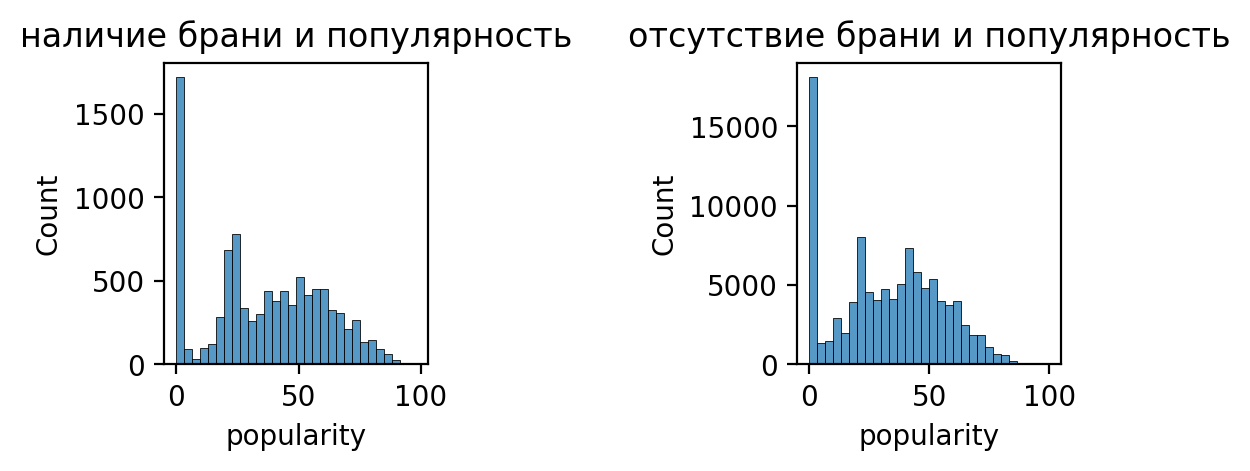

In [14]:
plt.figure(figsize=(16,9),dpi=200)

# Подграфик 1: Гистограмма популярности треков с бранью (explicit == True)
plt.subplot(4, 8, 1);
sns.histplot(data[data['explicit'] == True]['popularity'], bins=30);
plt.title('наличие брани и популярность');

# Подграфик 2: Гистограмма популярности треков без брани (explicit == False)
plt.subplot(4, 8, 3);
sns.histplot(data[data['explicit'] == False]['popularity'], bins=30);
plt.title('отсутствие брани и популярность');

<h3>Общие наблюдения:</h3>
<li>
Оба графика показывают, что большинство треков имеют низкую популярность, независимо от наличия или отсутствия брани.
</li>
<li>
Распределение популярности треков с явным содержимым и без него имеет схожий вид, что указывает на то, что наличие явного содержимого не является определяющим фактором для популярности треков в данном наборе данных.
</li>

### Длительность и популярность

Возможно длинные треки могут наскучить слушателю и они будут не популярны

Text(0.5, 1.0, 'более 5 минут')

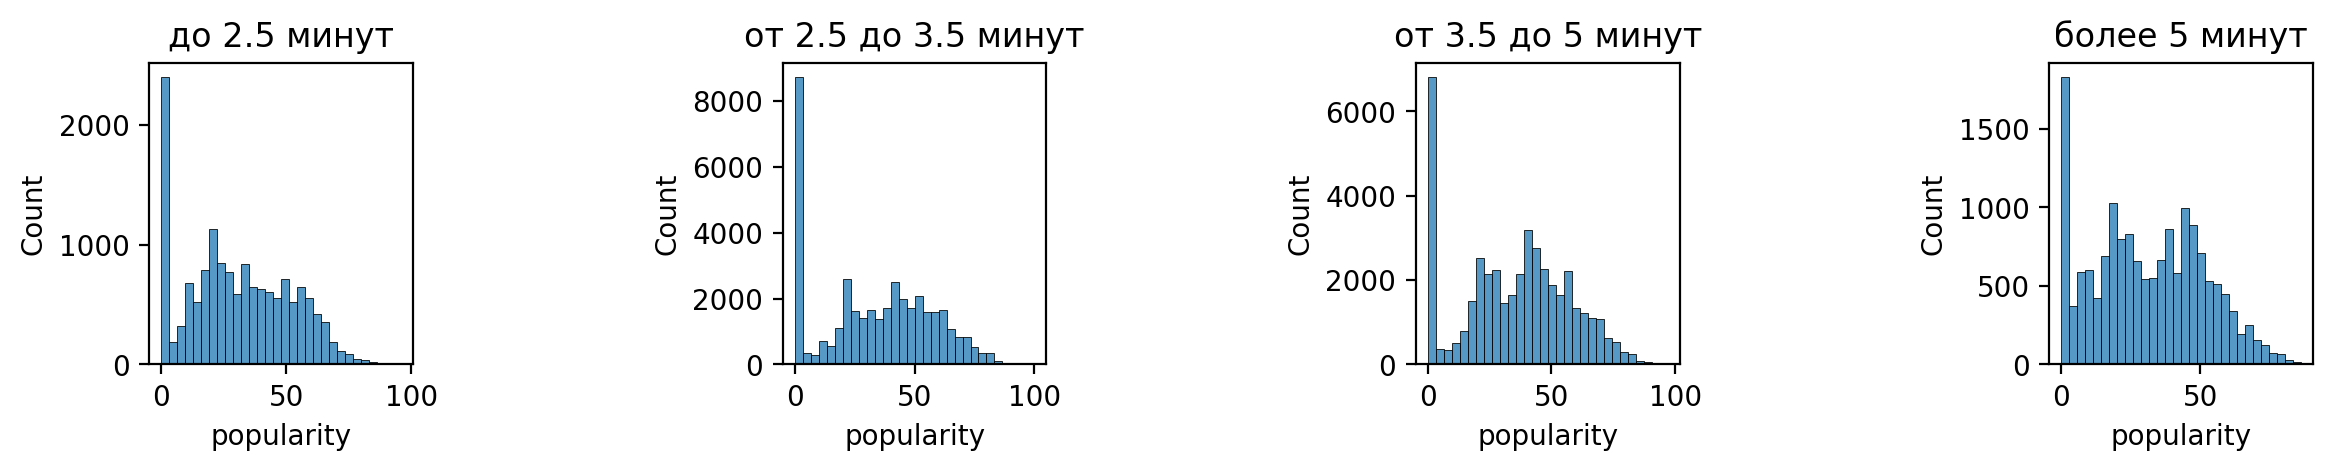

In [15]:
plt.figure(figsize=(16,9),dpi=200)

# треки до 2.5 минут
plt.subplot(4, 8, 1)
sns.histplot(data[data['duration_ms'] <= 150000]['popularity'], bins=30)
plt.title('до 2.5 минут')

# треки от 2.5 до 3.5 минут
plt.subplot(4, 8, 3)
sns.histplot(data[(150000 < data['duration_ms']) & (data['duration_ms'] <= 210000)]['popularity'], bins=30)
plt.title('от 2.5 до 3.5 минут')

# треки от 3.5 до 5 минут
plt.subplot(4, 8, 5)
sns.histplot(data[(data['duration_ms'] > 210000) & (data['duration_ms'] < 300000)]['popularity'], bins=30)
plt.title('от 3.5 до 5 минут')

# треки более 5 минут
plt.subplot(4, 8, 7)
sns.histplot(data[data['duration_ms'] > 300000]['popularity'], bins=30)
plt.title('более 5 минут')

<h3>Общие наблюдения:</h3>
<ul>
  <li>Треки от 2.5 до 3.5 минут более популярны, чем все остальные.</li>
  <li>Треки от 3.5 до 5 минут популярнее, чем треки до 2.5 минут и треки более 5 минут.</li>
</ul>

In [16]:
# добавление в датафрейм нового признака(Feature engineering)

df['duration_FE'] = 0
# Используем метод loc для выбора строк, 
# где значение 'duration_ms' находится в диапазоне от 150,000 до 210,000 миллисекунд (2.5 до 3.5 минут)
# Присваиваем значение 1 новому признаку 'duration_FE' для этих строк
df.loc[(df['duration_ms'] >= 150000) & (df['duration_ms'] <= 210000), 'duration_FE'] = 1

# Используем метод loc для выбора строк, 
# где значение 'duration_ms' находится в диапазоне от 210,001 до 300,000 миллисекунд (3.5 до 5 минут)
# Присваиваем значение 2 новому признаку 'duration_FE' для этих строк
df.loc[(df['duration_ms'] > 210000) & (df['duration_ms'] < 300000), 'duration_FE'] = 2

df[['duration_ms', 'duration_FE']]

,duration_ms,duration_FE
0,230666,2
1,149610,0
2,210826,2
3,201933,1
4,198853,1
...,...,...
113995,384999,0
113996,385000,0
113997,271466,2
113998,283893,2


### Key и популярность

Предположительно ничего не зависит от ключевой ноты в треке

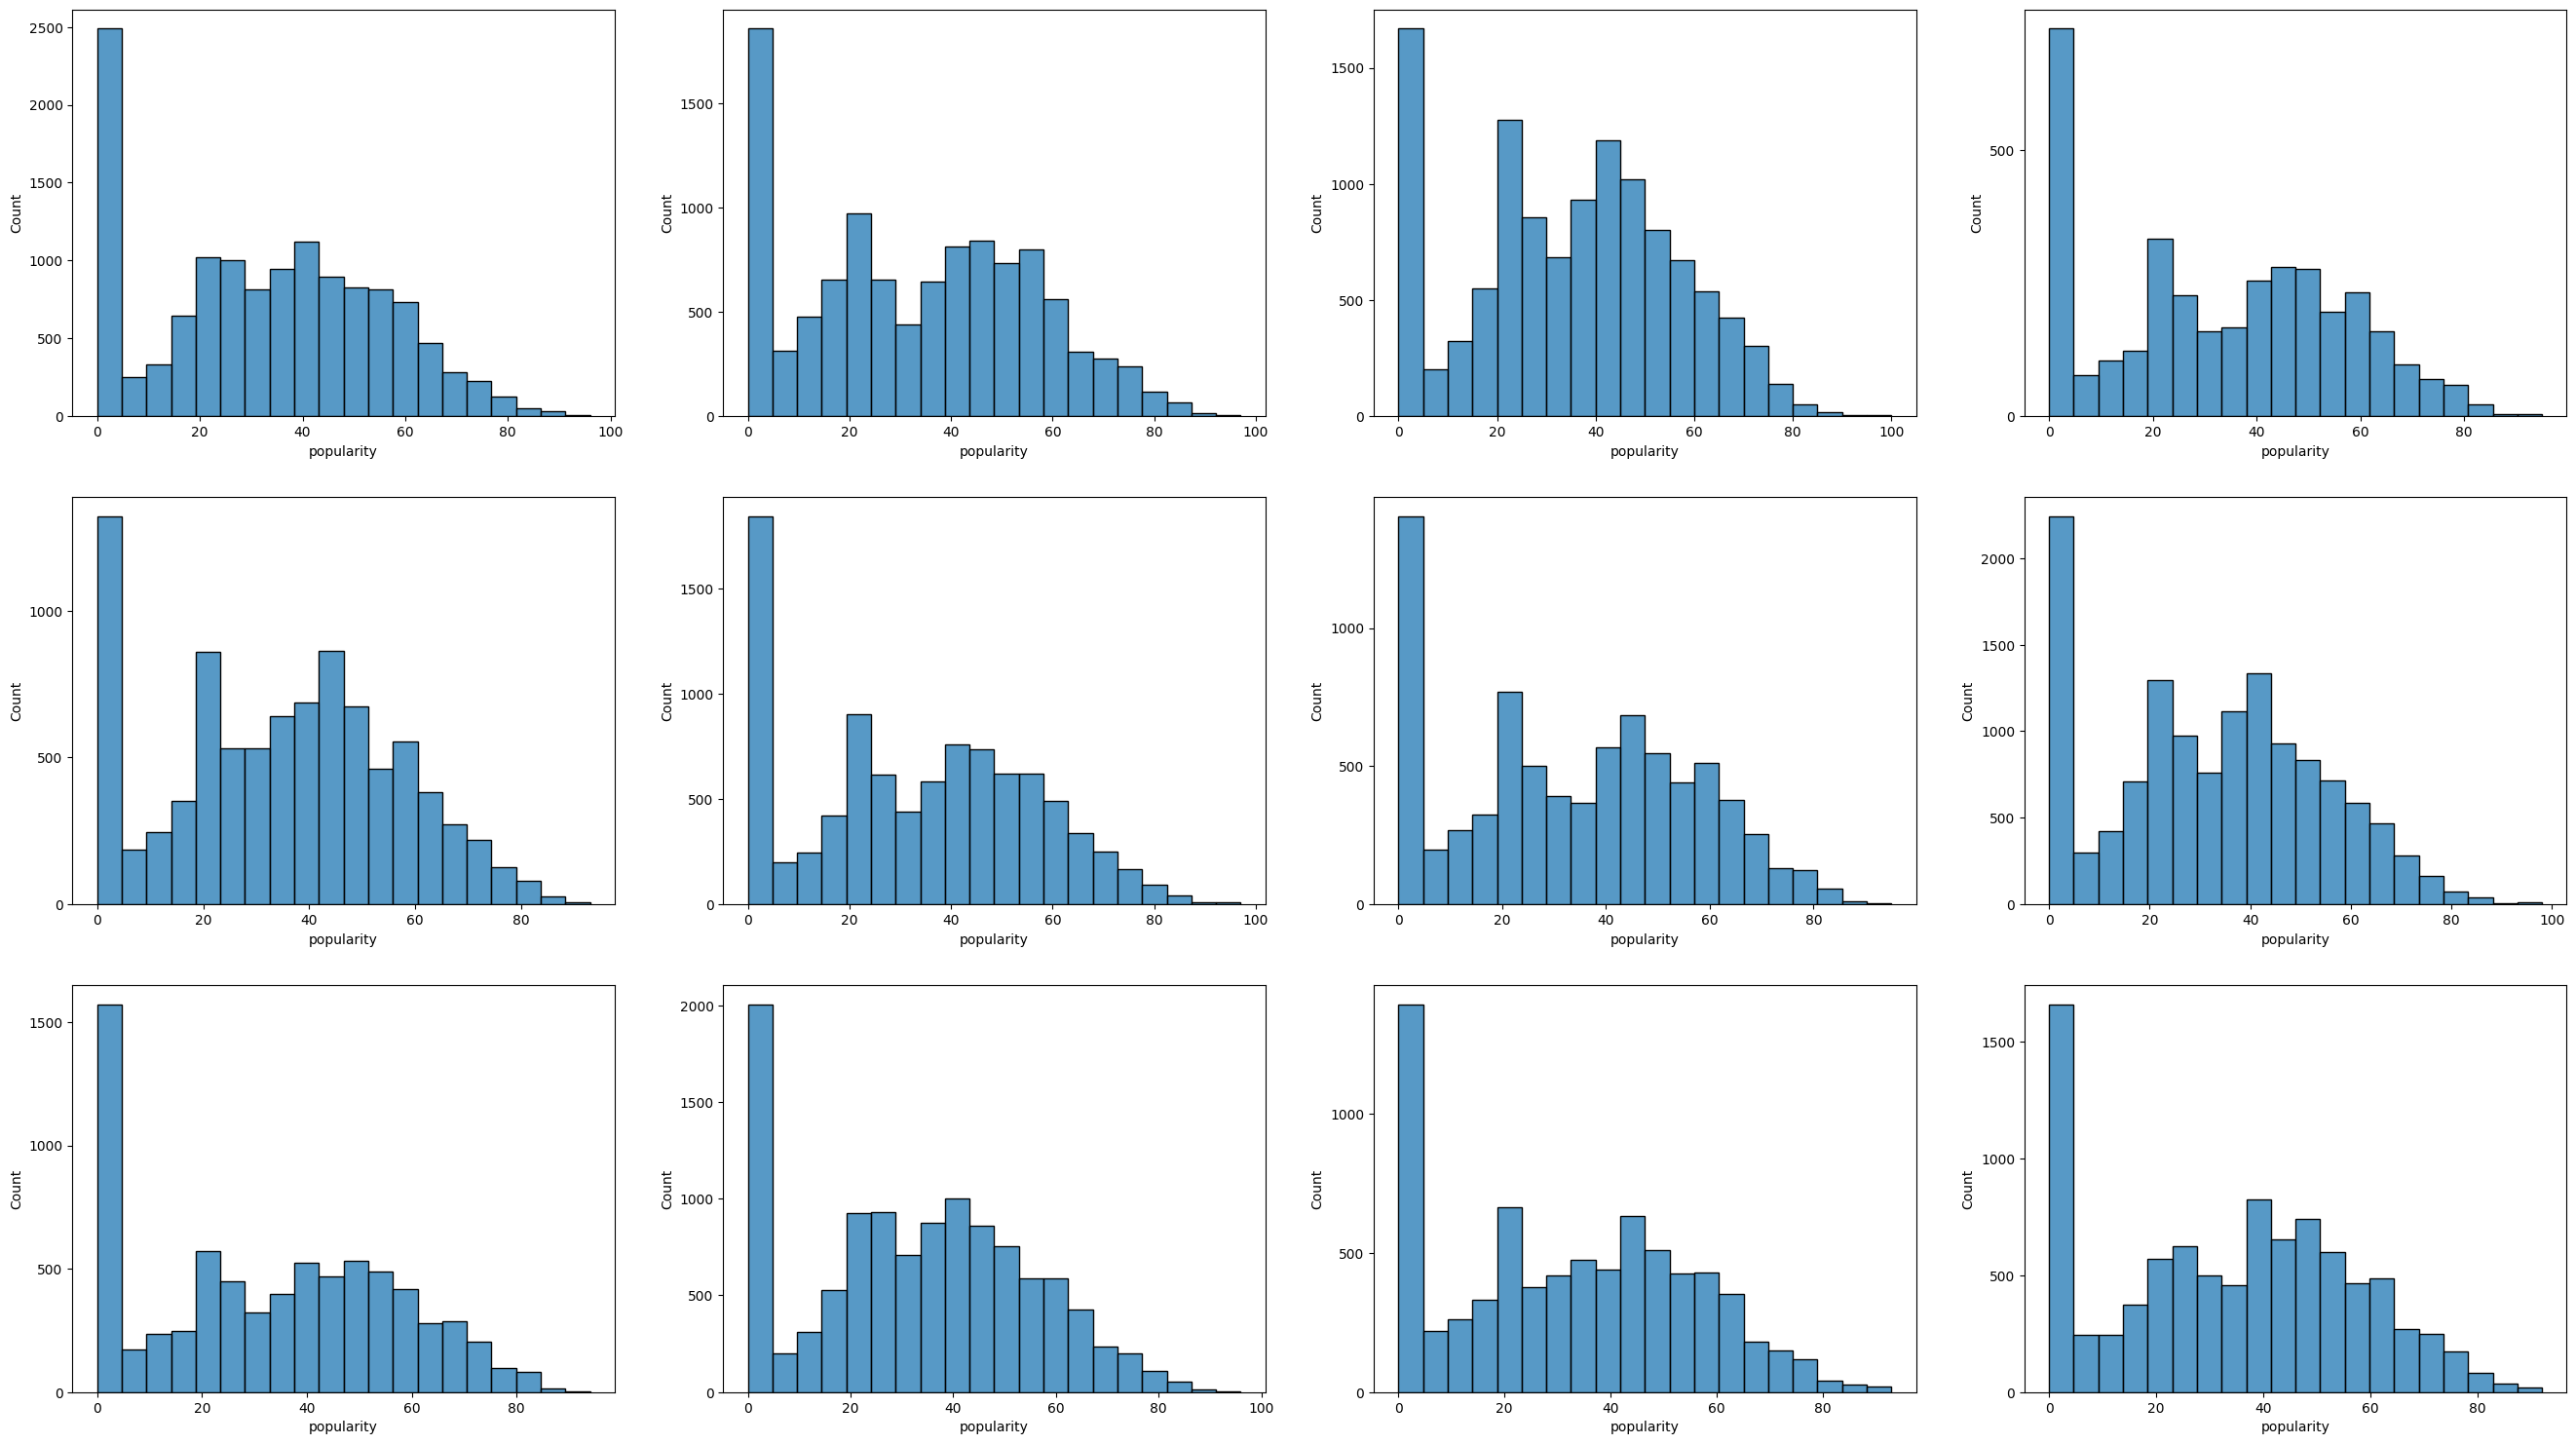

In [17]:
# Создаем сетку из 12 подграфиков для каждого значения 'key'

for i in range(12): 
    plt.subplot(4, 4, i+1)
    plt.subplots_adjust(left=0, right=4, bottom=1, top=5)
    plt.yticks([0,500,1000,1500,2000,2500, 3000])
    plt.xticks([0, 20, 40, 60, 80, 100])
    sns.histplot(data[data['key'] == i]['popularity'], bins=20)

# plt.hist2d(data['key'], data['popularity'], bins=30)
# plt.show()

<h3>Вывод:</h3>
<ul>
<li>
На всех гистограммах наблюдается схожее распределение популярности треков, что указывает на то, что значение key не является определяющим фактором для популярности треков.
</li>

</ul>

In [18]:
# Посмотрим на среднее значение 'key' 
data.groupby('key')['popularity'].mean().sort_values(ascending=False)

key
4     34.643650
2     34.377619
11    33.887632
6     33.585532
1     33.200241
3     33.031653
8     32.958696
5     32.930935
9     32.823566
7     32.582075
0     32.519945
10    32.461373
Name: popularity, dtype: float64

средние значения у всех нот почти одинаково

Популярность почти не зависит от ключа

### Громкость и популярность

Предположение: Чем громче, тем популярнее 

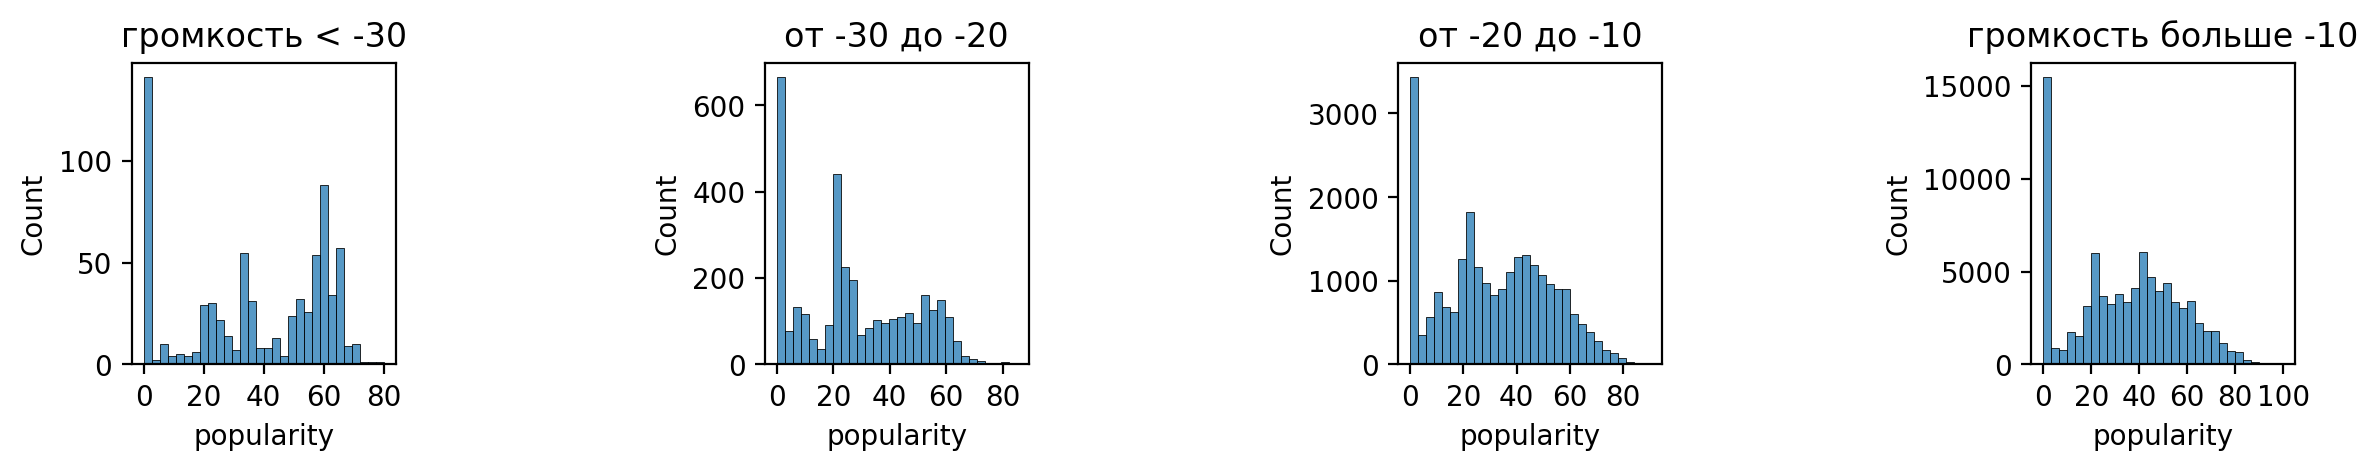

In [19]:
plt.figure(figsize=(16,9),dpi=200)

# Подграфик 1: Гистограмма популярности треков с громкостью менее -30
plt.subplot(4, 8, 1)
plt.xticks([0,20,40,60,80,100])
sns.histplot(data[(data['loudness'] <= -30)]['popularity'], bins=30)
plt.title('громкость < -30')

# Подграфик 3: Гистограмма популярности треков с громкостью от -30 до -20
plt.subplot(4, 8, 3)
plt.xticks([0,20,40,60,80,100])
sns.histplot(data[(data['loudness'] > -30) & (data['loudness'] <= -20)]['popularity'], bins=30)
plt.title('от -30 до -20')

# Подграфик 5: Гистограмма популярности треков с громкостью от -20 до -10
plt.subplot(4, 8, 5)
plt.xticks([0,20,40,60,80,100])
sns.histplot(data[(data['loudness'] > -20) & (data['loudness'] <= -10)]['popularity'], bins=30)
plt.title('от -20 до -10')

# Подграфик 7: Гистограмма популярности треков с громкостью больше -10
plt.subplot(4, 8, 7)
plt.xticks([0,20,40,60,80,100])
sns.histplot(data[(data['loudness'] > -10)]['popularity'], bins=30)
plt.title('громкость больше -10');

<h3>Общие наблюдения:</h3>
<li>
Первая гистограмма показывает, что треки с громкостью менее -30 дБ имеют широкий диапазон популярности, но большинство из них сконцентрированы в низком и высоком диапазоне популярности.
<li>
На второй гистограмме можно заметить, что большинство треков имеют низкую популярность (менее 50). 
Наблюдается значительное количество треков с популярностью близкой к нулю.
Количество треков с высокой популярностью (более 50) значительно меньше.
</li>
<li>
Третья гистограмма показывает, что треки с громкостью от -20 до -10 дБ имеют широкий диапазон популярности, но большинство из них сконцентрированы в ниже среднего диапазоне популярности.
</li>
<li>
Третий График показывает, что большинство значений популярности сконцентрированы в диапазоне от 40 до 60.

</li>

In [20]:
# Добавление в датафрейм нового признака (Feature engineering)

df['loudness_FE'] = 0

# Используем метод loc для выбора строк, где значение 'loudness' выше -10 дБ
# Присваиваем значение 1 новому признаку 'loudness_FE' для этих строк
df.loc[(df['loudness'] > -10), 'loudness_FE'] = 1

# Используем метод loc для выбора строк, где значение 'loudness' ниже или равно -30 дБ
# Присваиваем значение 2 новому признаку 'loudness_FE' для этих строк
df.loc[(df['loudness'] <= -30), 'loudness_FE'] = 2

df[['loudness', 'loudness_FE']]

,loudness,loudness_FE
0,-6.746,1
1,-17.235,0
2,-9.734,1
3,-18.515,0
4,-9.681,1
...,...,...
113995,-16.393,0
113996,-18.318,0
113997,-10.895,0
113998,-10.889,0


### Зависимость danceability c популярностью

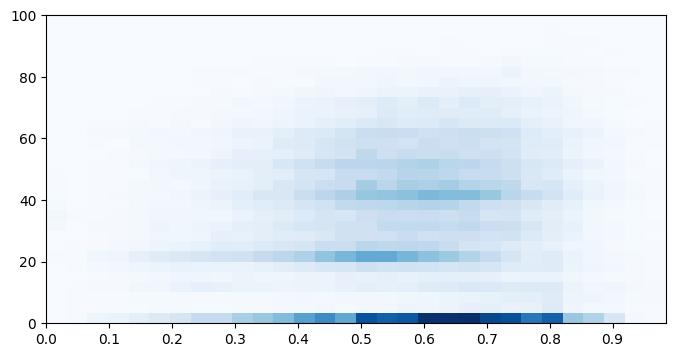

In [21]:
# Строим двумерную гистограмму (heatmap) для данных танцевальности и популярности
# bins=30 определяет количество интервалов (бинов) по каждой оси
# cmap='Blues' задает цветовую карту для отображения плотности данных
plt.figure(figsize=(8, 4))
plt.hist2d(data['danceability'], data['popularity'], bins=30, cmap='Blues')
plt.xticks([i/10 for i in range(10)])
plt.show()

<h3>Вывод по графику:</h3>
<ul>
<li>
<b>Концентрация данных:</b>

Наибольшая концентрация данных наблюдается в диапазоне популярности от 20 до 60 и в диапазоне танцевальности от 0.4 до 0.7. Это указывает на то, что большинство треков с умеренной танцевальностью имеют среднюю популярность.
</li>
<li>
<b>Высокая танцевальность и популярность:</b> 

Треки с высокой танцевальностью (значения близкие к 0.8-0.9) также имеют среднюю популярность, но их количество значительно меньше по сравнению с треками средней танцевальности.

</li>
<li>
<b>Низкая танцевальность:</b> 

Треки с низкой танцевальностью (значения близкие к 0.0-0.2) имеют низкую популярность. Это видно по светлым областям в левой части графика.

</li>

<li>
<b>Распределение популярности:</b> 

Популярность треков распределена довольно равномерно в диапазоне от 20 до 60, независимо от уровня танцевальности. Это указывает на то, что танцевальность не является единственным фактором, влияющим на популярность трека.


</li>
</ul>

### Зависимость energy с популярностью

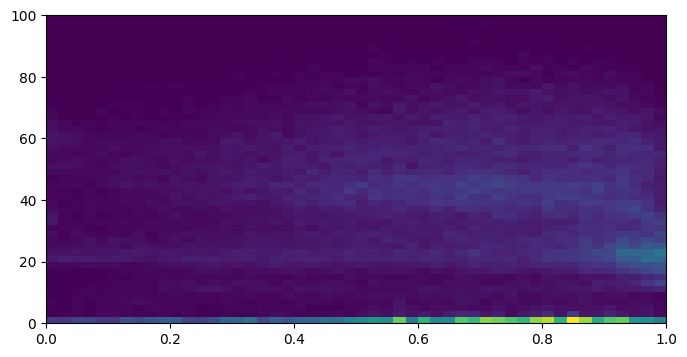

In [22]:
plt.figure(figsize=(8, 4))
plt.hist2d(data['energy'], data['popularity'], bins=50)
plt.show()

<h3>Вывод по графику:</h3>
<ul>
<li>
<b>Концентрация данных:</b>

Наибольшая концентрация данных наблюдается в диапазоне популярности от 20 до 60 и в диапазоне энергичности от 0.4 до 0.9. Это указывает на то, что большинство треков с умеренной энергичностью имеют среднюю популярность.
</li>
<li>
<b>Высокая и Низкая энергичность:</b> 

Треки с высокой (значения близкие к 0.9-1.0) и низкой (значения близкие к 0.0-0.2) энергичностью имеют низкую популярность. Это видно по темным областям в левой части графика.




<li>
<b>Отсутствие экстремальных значений:</b> 

На графике не наблюдается значительных концентраций данных в области экстремально высокой или низкой популярности.

</li>
</ul>

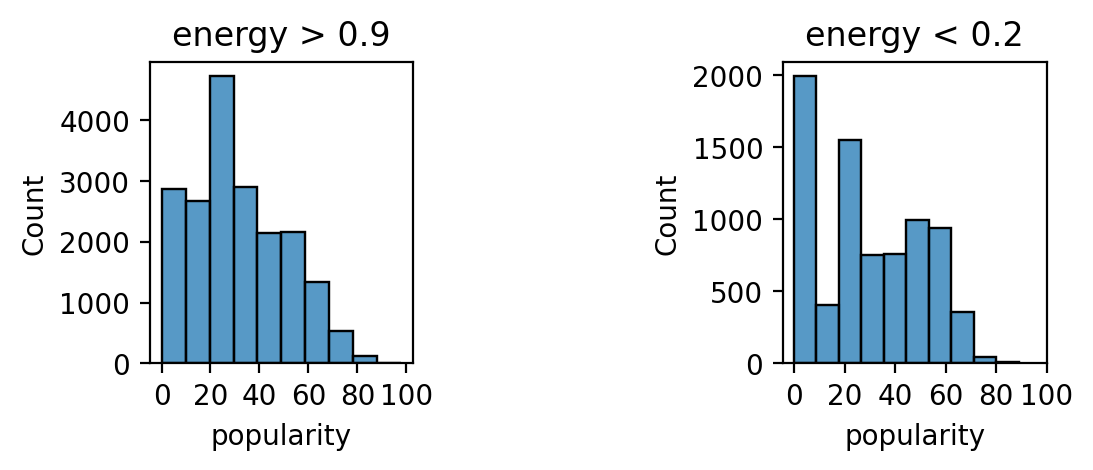

In [23]:
plt.figure(figsize=(16,9),dpi=200)

plt.subplot(4, 8, 1)
sns.histplot(data[(data['energy'] > 0.9)]['popularity'], bins=10)
plt.xticks([0, 20, 40, 60, 80, 100])
plt.title('energy > 0.9');

plt.subplot(4, 8, 3)
sns.histplot(data[(data['energy'] < 0.2)]['popularity'], bins=10)
plt.xticks([0, 20, 40, 60, 80, 100])
plt.title('energy < 0.2');

<h3>Общие наблюдения:</h3>
<ul>
<li>
Левый  график: 

Большинство треков с низкой энергичностью также имеют популярность в диапазоне от 0 до 60.
Наибольшая концентрация треков приходится на популярность около 0-30.
Количество треков с высокой популярностью (более 50) значительно меньше, чем у правого графика.
<li>
Правый  график:
 
Большинство треков с низкой энергичностью также имеют популярность в диапазоне от 0 до 60.
Наибольшая концентрация треков приходится на популярность около 0-10.

</li>
</ul>


In [24]:
# Добавление нового признака (Feature engineering)

df['energy_FE'] = 0

# Используем метод loc для выбора строк, где значение 'energy' выше 0.9
# Присваиваем значение 1 новому признаку 'energy_FE' для этих строк
df.loc[(df['energy'] > 0.9), 'energy_FE'] = 1

# Используем метод loc для выбора строк, где значение 'energy' ниже 0.2
# Присваиваем значение 2 новому признаку 'energy_FE' для этих строк
df.loc[(df['energy'] < 0.2), 'energy_FE'] = 2

df[['energy', 'energy_FE']]

,energy,energy_FE
0,0.4610,0
1,0.1660,2
2,0.3590,0
3,0.0596,2
4,0.4430,0
...,...,...
113995,0.2350,0
113996,0.1170,2
113997,0.3290,0
113998,0.5060,0


### Temp и популярность

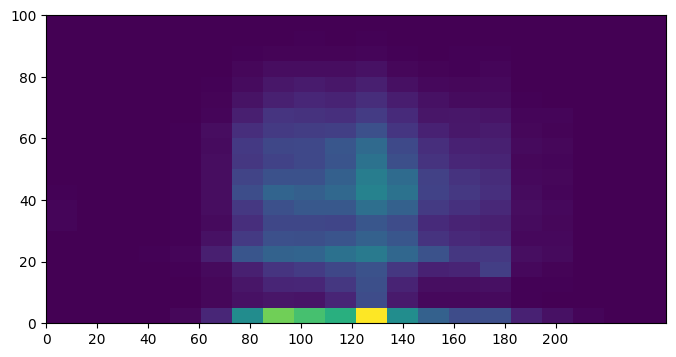

In [25]:
# Строим двумерную гистограмму (heatmap) для данных tempo и популярности
plt.figure(figsize=(8, 4))
plt.hist2d(data['tempo'], data['popularity'], bins=20)
plt.xticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])
plt.show()

# plt.figure(figsize=(16,9),dpi=200)
# plt.subplot(4, 8, 1)
# sns.histplot(data1[(data1['tempo'] > 135) & (data1['tempo'] < 150)]['popularity'], bins=10)
# plt.title('-')

<h3>Основные наблюдения:</h3>

<ul>
<li><strong>Концентрация данных:</strong>

Наибольшая концентрация данных наблюдается в диапазоне темпа от 80 до 140 BPM и популярности от 20 до 60.
Это указывает на то, что большинство треков с умеренным темпом имеют среднюю популярность.
</li>
</li>
<li><strong>Низкая и высокая популярность:</strong>

Треки с низкой популярностью (менее 20) и высокой популярностью (более 60) встречаются реже и распределены более равномерно по всему диапазону темпа.

</li>
</ul>



### Жанр и популярность

разные жанры имеют разную среднюю популярность

In [26]:
# Вычисление средней популярности треков для каждого жанра и сортировка результатов в порядке убывания
mean_genre_popularity = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
mean_genre_popularity

track_genre
pop-film          59.283000
k-pop             56.952953
chill             53.651000
sad               52.379000
grunge            49.594000
                    ...    
chicago-house     12.339000
detroit-techno    11.174000
latin              8.297000
romance            3.245000
iranian            2.210000
Name: popularity, Length: 114, dtype: float64

In [27]:
# Добавление нового признака (Feature engineering)

# Функция genre_FE принимает значение популярности и возвращает категорию на основе заданных диапазонов
def categorizatio_avg_popularity(popularity):
    if popularity >= 45:
        return 6
    elif popularity >= 40:
        return 5
    elif popularity >= 35:
        return 4
    elif popularity >= 30:
        return 3
    elif popularity >= 25:
        return 2
    elif popularity >= 20:
        return 1
    else:
        return 0

# Используем метод merge для объединения исходного датафрейма data с датафреймом mean_genre_popularity по столбцу track_genre
data_with_mean_genre_popularity = pd.merge(data, mean_genre_popularity, on='track_genre', how='left')

# Применяем функцию categorizatio_avg_popularity к столбцу popularity_y в объединенном датафрейме с помощью метода apply
data_with_mean_genre_popularity['popularity_y'] = data_with_mean_genre_popularity['popularity_y'].apply(lambda x: categorizatio_avg_popularity(x))

# Добавляем новый признак genre_FE в исходный датафрейм df, присваивая ему значения из столбца popularity_y объединенного датафрейма
df['genre_FE'] = data_with_mean_genre_popularity['popularity_y']
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_FE,loudness_FE,energy_FE,genre_FE
0,62845,10357,8100,11741,73,230666,0,0.676,0.4610,1,...,0.000001,0.3580,0.7150,87.917,4,0,2,1,0,5.0
1,55667,3287,14796,22528,55,149610,0,0.420,0.1660,1,...,0.000006,0.1010,0.2670,77.489,4,0,0,0,2,5.0
2,19766,12397,39162,60774,57,210826,0,0.438,0.3590,0,...,0.000000,0.1170,0.1200,76.332,4,0,2,1,0,5.0
3,77941,14839,8580,9580,71,201933,0,0.266,0.0596,0,...,0.000071,0.1320,0.1430,181.740,3,0,1,0,2,5.0
4,68241,5255,16899,25689,82,198853,0,0.618,0.4430,2,...,0.000000,0.0829,0.1670,119.949,4,0,1,1,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,25198,22486,66,53329,21,384999,0,0.172,0.2350,5,...,0.928000,0.0863,0.0339,125.995,5,113,0,0,0,5.0
113996,19583,22486,66,65090,22,385000,0,0.174,0.1170,0,...,0.976000,0.1050,0.0350,85.239,4,113,0,0,2,5.0
113997,80126,4952,5028,38207,22,271466,0,0.629,0.3290,0,...,0.000000,0.0839,0.7430,132.378,4,113,2,0,0,5.0
113998,30455,18534,7238,21507,41,283893,0,0.587,0.5060,7,...,0.000000,0.2700,0.4130,135.960,4,113,2,0,0,5.0


In [28]:
# проверка на нулевые значение в датасете
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_FE         0
loudness_FE         0
energy_FE           0
genre_FE            1
dtype: int64

In [29]:
# убрал строку с нулевым значением
df = df.dropna()
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_FE         0
loudness_FE         0
energy_FE           0
genre_FE            0
dtype: int64

### Количество упоминаний артиста и популярность 

Возможно количество упоминаний артиста в датасете означает его популярность

In [30]:
# # средняя популярность артиста

# # Создаем копию исходного датафрейма data, чтобы избежать изменения оригинальных данных
# data_artists_split = data.copy()
# # Разделяем строки в столбце artists на списки, используя точку с запятой в качестве разделителя
# data_artists_split['artists'] = data_artists_split['artists'].str.split(';')

# # Используем метод explode, чтобы развернуть списки артистов в отдельные строки
# exploded_df = data_artists_split.explode('artists')
# # Группируем данные по артистам и вычисляем среднюю популярность для каждого артиста
# # Используем метод reset_index, чтобы сбросить индекс и преобразовать результат в датафрейм
# average_popularity = exploded_df.groupby('artists')['popularity'].mean().reset_index()

# average_popularity.columns = ['artist', 'average_popularity']

# # Сортируем результаты по убыванию средней популярности
# average_popularity = average_popularity.sort_values(by='average_popularity', ascending=False)
# average_popularity

In [31]:
# # Копирование данных
# artist_count = data.copy()

# # Преобразование столбца artists
# artist_count['artists'] = artist_count['artists'].str.split(';')

# # Развертывание списков
# exploded_df = artist_count.explode('artists')
# # Подсчет количества треков для каждого артиста
# artist_counts = exploded_df['artists'].value_counts().reset_index()

# artist_counts.columns = ['artist', 'count']
# artist_counts_sorted = artist_counts.sort_values(by='count', ascending=False)


# merged_df = pd.merge(artist_counts, average_popularity, on='artist')


In [32]:
# Создаем копию исходного датафрейма data, чтобы избежать изменения оригинальных данных
data_artists_split = data.copy()
# Разделяем строки в столбце artists на списки, используя точку с запятой в качестве разделителя
data_artists_split['artists'] = data_artists_split['artists'].str.split(';')

# Используем метод explode, чтобы развернуть списки артистов в отдельные строки
exploded_df = data_artists_split.explode('artists')
# Группируем данные по артистам и вычисляем среднюю популярность для каждого артиста
# Используем метод reset_index, чтобы сбросить индекс и преобразовать результат в датафрейм
average_popularity = exploded_df.groupby('artists')['popularity'].mean().reset_index()

average_popularity.columns = ['artist', 'average_popularity']

# Сортируем результаты по убыванию средней популярности
average_popularity = average_popularity.sort_values(by='average_popularity', ascending=False)

# Копирование данных
artist_count = data.copy()

# Подсчет количества треков для каждого артиста
artist_counts = exploded_df['artists'].value_counts().reset_index()

artist_counts.columns = ['artist', 'count']
artist_counts_sorted = artist_counts.sort_values(by='count', ascending=False)

# Объединение данных
merged_df = pd.merge(artist_counts, average_popularity, on='artist')

# Вывод результатов
merged_df

,artist,count,average_popularity
0,J Balvin,510,17.588235
1,Bad Bunny,416,29.908654
2,Daddy Yankee,375,20.504000
3,Wolfgang Amadeus Mozart,354,10.135593
4,Feid,348,8.936782
...,...,...,...
29854,Endor,1,23.000000
29855,Butcher Babies,1,23.000000
29856,MY M8 JAY,1,42.000000
29857,MIRAMAR,1,39.000000


In [33]:
# наивысшая средняя популярность
merged_df.sort_values(by='average_popularity', ascending=False).head(20)

,artist,count,average_popularity
26268,Quevedo,1,99.0
26267,Bizarrap,1,99.0
10575,Harry Styles,3,92.0
8486,Luar La L,4,90.5
19874,Beach Weather,1,90.0
27286,Pablo Pesadilla,1,88.0
27287,Polimá Westcoast,1,88.0
6149,Olivia Rodrigo,5,87.4
26160,Yung Gravy,1,87.0
8737,BYOR,4,87.0


In [34]:
# наименьшая средняя популярность
merged_df.sort_values(by='average_popularity', ascending=True).head(20)

,artist,count,average_popularity
4360,Steve Winwood,8,0.0
9843,Brian Culbertson,3,0.0
26211,Jeezy,1,0.0
14119,Maratone,2,0.0
26227,Two Stacks,1,0.0
26228,Pink Panda,1,0.0
14126,Panache Desai,2,0.0
22274,Misery Signals,1,0.0
5299,Aribo,6,0.0
14167,Axero,2,0.0


<h3>Основные наблюдения:</h3>

<ul>
<li><strong>Разное количество треков:</strong>

Артисты с одним треком могут иметь как очень высокую, так и очень низкую популярность. Это указывает на то, что популярность трека не всегда зависит от количества треков артиста.

Артисты с большим количеством треков могут иметь как высокую, так и низкую среднюю популярность, что свидетельствует о вариабельности их успеха.

</li>
</li>
<li><strong>Искажение данных:</strong>

Использование средней популярности может привести к искажению данных, так как оно не учитывает количество треков. Артисты с меньшим количеством треков, но с высокой популярностью могут получить завышенную среднюю популярность.


</li>
</ul>



### чем больше артистов на треке, тем больше популярность

In [35]:
# Копирование данных
n_artists = data.copy()
# Подсчет количества артистов
n_artists['artist_count'] = n_artists['artists'].str.split(';').apply(lambda x: len(x))

# Вычисление средней популярности
average_n_popularity = n_artists.groupby('artist_count')['popularity'].mean().reset_index()

average_n_popularity

,artist_count,popularity
0,1,33.069587
1,2,33.707370
2,3,34.315242
3,4,33.118406
4,5,31.738281
5,6,29.782805
6,7,29.135593
7,8,33.254902
8,9,27.333333
9,10,26.041667


есть сомнения, что трек может содержать более 20 артистов

In [36]:
# смотрю кто имеет больше всего артистов на треке
n_artists.sort_values(by='artist_count', ascending=False).head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,artist_count
104241,104241,7F5rc8a0xD6DCloB2kROq9,Aitana;Alejandro Sanz;Antonio José;Antonio Oro...,Himno A La Alegría,Himno A La Alegría,66,307473,False,0.304,0.328,...,1,0.0351,0.5600,0.000000,0.116,0.243,119.675,4,spanish,38
98961,98961,7guz8LWGuiHSvp19OUxmbQ,Ariana DeBose;David Alvarez;Ana Isabelle;Jenni...,West Side Story (Original Motion Picture Sound...,America,49,297666,False,0.521,0.419,...,1,0.1090,0.5500,0.000092,0.726,0.827,159.390,3,show-tunes,32
51548,51548,79blZUG11a6vtTL3Nt9J78,Arjun;Badshah;Bohemia;Diljit Dosanjh;Fateh;Gip...,Punjabi Mashup,Punjabi Mashup,61,306572,False,0.418,0.931,...,1,0.1740,0.0028,0.000077,0.332,0.707,129.994,4,hip-hop,31
80580,80580,7Hm5FQw1NQtfnTI7JUExaP,Shekhar Ravjiani;Shilpa Rao;Aakanksha Sharma;A...,Love Mashup,Love Mashup,60,240017,False,0.711,0.673,...,0,0.0336,0.2500,0.000000,0.214,0.393,109.992,4,pop-film,30
104793,104793,2NWWhvKfxY7jVG2PH5F5CY,Sidonie;Joan Manuel Serrat;Leiva;Vetusta Morla...,Lo Más Maravilloso,"Fascinados (feat. Joan Manuel Serrat, Leiva, V...",55,274146,False,0.639,0.883,...,0,0.0688,0.0843,0.000071,0.225,0.431,140.008,4,spanish,30


в датасете действительно есть треки с более чем 20 артистами

<h3>Основные наблюдения:</h3>

<ul>
<li><strong>Средняя популярность:</strong>

Средняя популярность треков варьируется в зависимости от количества артистов. Например, треки с одним артистом имеют среднюю популярность около 33.07, тогда как треки с двадцатью пятью артистами имеют среднюю популярность около 66.00.

Треки с большим количеством артистов (более 15) имеют более высокую среднюю популярность по сравнению с треками с меньшим количеством артистов. Однако, эти треки являются единичными, что может искажать общую картину.

</li>

</ul>



# <b>ОБУЧЕНИЕ</b>

## <h2>Эксперименты с моделями машинного обучения</h2>

### Подготовка

In [37]:
# убираю 'track_id', 'artists', 'track_name', 'album_name' так как они не представляют ценности
df = df.drop(columns=['track_id', 'artists', 'track_name', 'album_name'])

In [38]:
# Разделение данных на обучающую и тестовую выборки

X = df.drop(columns=['popularity'])
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_FE,loudness_FE,energy_FE,genre_FE
0,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,2,1,0,5.0
1,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,0,0,2,5.0
2,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,2,1,0,5.0
3,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,1,0,2,5.0
4,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,1,1,0,5.0


In [39]:
# стандартизации признаков
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Ridge

In [41]:

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import Ridge

# Инициализация модели Ridge Regression
model = Ridge()

# обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_pred, y_test)

print('результаты модели')
print(f'MAE: {mae}')
print(f"MSE: {mse}")
print(f'RMSE: {rmse}')
print(f"mape: {mape}")

результаты модели
MAE: 14.415288902309747
MSE: 375.2223643210193
RMSE: 19.370657302245046
mape: 0.48486044473078455


### GradientBoostingRegressor

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

# Инициализация модели GradientBoostingRegressor
model = GradientBoostingRegressor()

# обучение модели
model.fit(X_train,y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

print(f"MAE: {mean_absolute_error(y_pred,y_test)}")
print(f"MSE: {mean_squared_error(y_pred,y_test)}")
print(f"RMSE: {mean_squared_error(y_pred,y_test)**0.5}")
print(f"MAPE: {mean_absolute_percentage_error(y_pred ,y_test)}")

MAE: 14.175767226314793
MSE: 363.68189111140947
RMSE: 19.070445488016514
MAPE: 0.47642735074821013


### LinearRegression

In [43]:
from sklearn.linear_model import LinearRegression

# Инициализация модели LinearRegression
model = LinearRegression()

# обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_pred, y_test)

print('результаты модели')
print(f'MAE: {mae}')
print(f"MSE: {mse}")
print(f'RMSE: {rmse}')
print(f"mape: {mape}")

результаты модели
MAE: 14.415270496292791
MSE: 375.22236481067404
RMSE: 19.37065731488413
mape: 0.48486120936567345


### Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Инициализация модели RandomForestRegressor
model = RandomForestRegressor()

# обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_pred, y_test)

print('результаты модели')
print(f'MAE: {mae}')
print(f"MSE: {mse}")
print(f'RMSE: {rmse}')
print(f"mape: {mape}")

результаты модели
MAE: 11.967017612138502
MSE: 279.1393398005296
RMSE: 16.70746359566675
mape: 0.46397538600312355


### DecisionTreeRegressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

# Инициализация модели DecisionTreeRegressor
model = DecisionTreeRegressor()

# обучение модели
model.fit(X_train, y_train)

# Вычисление метрик
y_pred = model.predict(X_test)

print(f"MSE: {mean_squared_error(y_pred, y_test)}")
print(f"RMSE: {mean_squared_error(y_pred, y_test)**0.5}")
print(f"MAE: {mean_absolute_error(y_pred, y_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_pred, y_test)}")

MSE: 596.3315483767263
RMSE: 24.419900662712088
MAE: 15.820380170511749
MAPE: 1.077644231887948e+16


### Sequential

In [54]:
import tensorflow as tf
from tensorflow import keras


# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_pred, y_test)


print(f'Test Loss: {loss}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

Epoch 1/10


c:\Users\ditriy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 540.1127 - val_loss: 381.6039
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - loss: 376.3385 - val_loss: 378.7140
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step - loss: 371.2605 - val_loss: 378.3665
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 976us/step - loss: 369.4563 - val_loss: 374.4929
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 367.4223 - val_loss: 373.2898
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 370.5799 - val_loss: 371.8970
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 366.7571 - val_loss: 371.0954
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 362.6127 - val_loss: 371.8957
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 356.2812 - val_loss: 370.0914
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 363.0573 - val_loss: 367.2073
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - loss: 360.9720
713/713 ━━━━━━━━━━━━━━

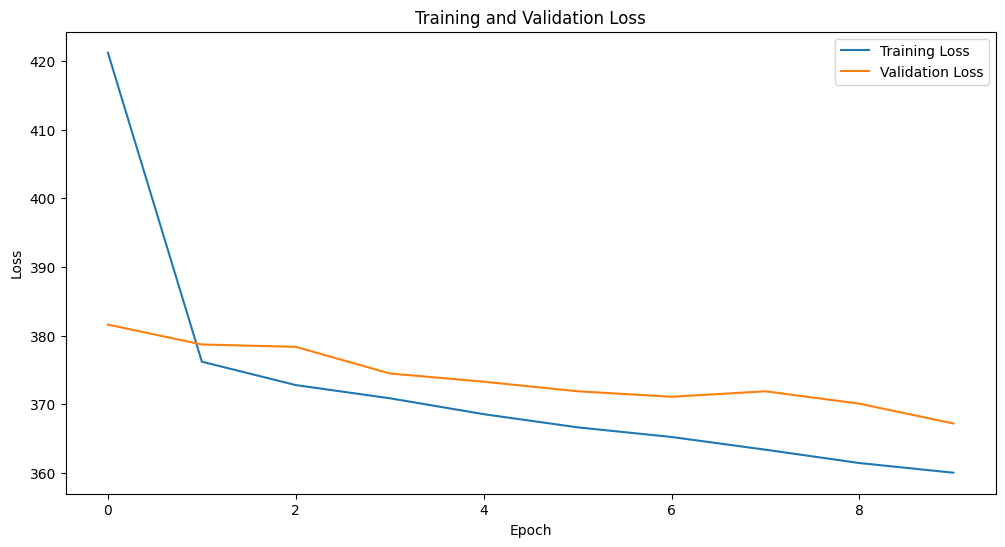

In [55]:
# График потерь (Loss) во время обучения
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

<h3> Анализ графика:</h3>
<ul>
    <li><strong>Начальные эпохи:</strong>
        <ul>
            <li>В начале обучения (эпоха 0) наблюдается высокая потеря на обучающей выборке, которая резко снижается в первые эпохи.</li>
            <li>Потери на валидационной выборке также снижаются, но не так резко.</li>
        </ul>
    </li>
    <li><strong>Средние эпохи:</strong>
        <ul>
            <li>По мере увеличения количества эпох, потери на обучающей выборке продолжают снижаться, но уже не так стремительно.</li>
            <li>Потери на валидационной выборке также снижаются, но начинают стабилизироваться.</li>
        </ul>
    </li>
    <li><strong>Последние эпохи:</strong>
        <ul>
            <li>К концу обучения (эпоха 8 и далее) потери на обучающей выборке продолжают медленно снижаться.</li>
            <li>Потери на валидационной выборке стабилизируются и могут даже немного увеличиться, что может указывать на начало переобучения.</li>
        </ul>
    </li>
</ul>


Попытка улучшить модель с помощью предотвращения переобучения:

In [59]:
# Build the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5), # Dropout для предотвращения переобучения
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5), # Dropout для предотвращения переобучения
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_pred, y_test)

print(f'Test Loss: {loss}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')


Epoch 1/10


c:\Users\ditriy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 542.1349 - val_loss: 385.7129
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 410.7661 - val_loss: 379.7443
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 398.0108 - val_loss: 389.8773
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 395.1445 - val_loss: 378.9756
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 388.5973 - val_loss: 383.7201
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 389.3387 - val_loss: 399.8167
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 383.9699 - val_loss: 389.7436
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 383.1582 - val_loss: 396.7467
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 377.3028 - val_loss: 404.4863
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 383.6567 - val_loss: 407.5952
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 395.9617
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 

<strong>Выводы:</strong>

<ul>
<li>Эта модель показала более высокие значения потерь на тестовой выборке (Test Loss) по сравнению с первой моделью.</li> <li>Метрики MAPE, MAE и RMSE также увеличились, что указывает на снижение точности предсказаний.</li>
</ul>

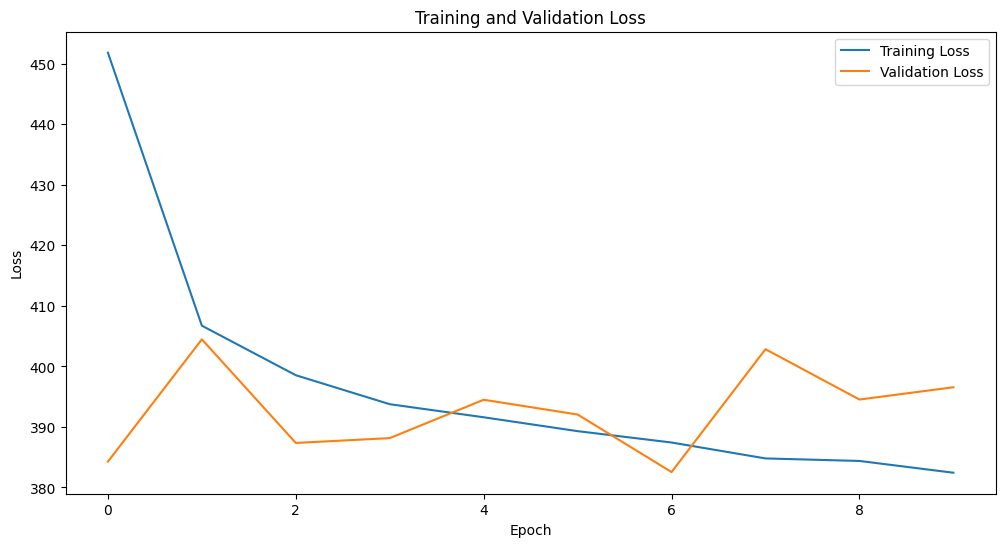

In [58]:
# График потерь (Loss) во время обучения
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


<h3>Подробное объяснение графика:</h3>

<ul> 
<li><strong>Начальные эпохи:</strong> 
<ul> 
<li>В начале обучения (эпоха 0) наблюдается высокая потеря на обучающей выборке, которая резко снижается в первые эпохи.</li> <li>Потери на валидационной выборке также снижаются, но не так резко и имеют колебания.</li> </ul> </li> <li><strong>Средние эпохи:</strong> 
<ul> 
<li>По мере увеличения количества эпох, потери на обучающей выборке продолжают снижаться, но уже не так стремительно.</li> 
<li>Потери на валидационной выборке также снижаются, но начинают колебаться, что может указывать на нестабильность модели.</li> 
</ul> 
</li>
<li><strong>Последние эпохи:</strong> 
<ul> 
<li>К концу обучения (эпоха 8 и далее) потери на обучающей выборке продолжают медленно снижаться.</li> 
<li>Потери на валидационной выборке стабилизируются, но имеют значительные колебания, что может указывать на переобучение или недостаток данных для валидации.</li> 
</ul> 
</li> 
</ul>

Попытка улучшить модель с помощью добавления новых слоев и уменьшения dropout

In [61]:
# Build the model
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(32, activation='relu'),

    keras.layers.Dense(16, activation='relu'),

    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_pred, y_test)

print(f'Test Loss: {loss}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')


Epoch 1/10


c:\Users\ditriy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 485.3051 - val_loss: 381.4037
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 386.8363 - val_loss: 380.4330
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 386.7454 - val_loss: 377.3590
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 382.3824 - val_loss: 378.0281
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 376.5869 - val_loss: 403.3660
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 377.7393 - val_loss: 379.1184
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 373.9656 - val_loss: 380.4432
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 375.6500 - val_loss: 381.8762
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 370.1970 - val_loss: 383.1482
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 368.4078 - val_loss: 388.2945
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 375.5688
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 

<strong>Выводы:</strong>

<ul>
 <li>Значение Test Loss составляет 378.1545715332031, что больше, чем на первой моделе(361.80950927734375). 
 </li>
 <li>
Все другие метрики стали немного хуже
 </li>
 </ul>

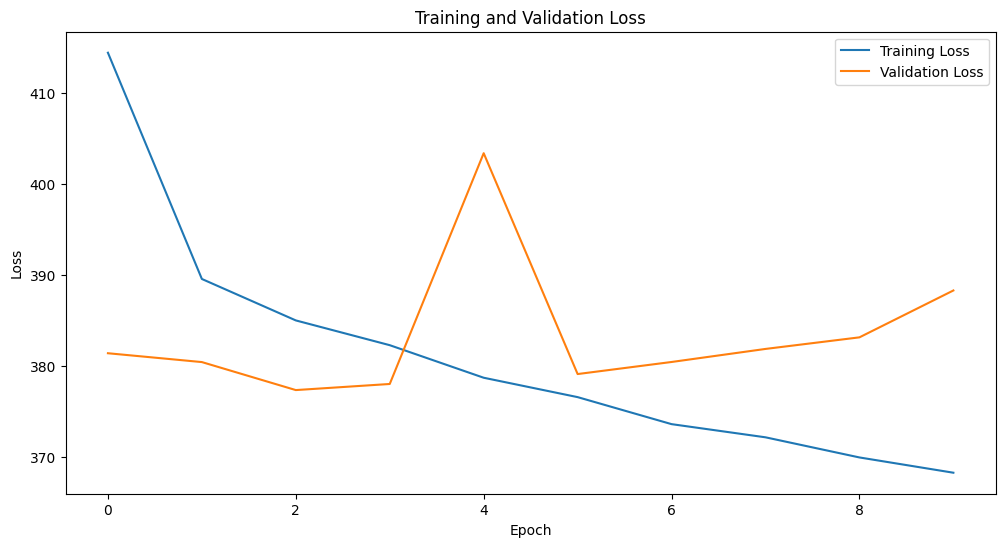

In [62]:
# График потерь (Loss) во время обучения
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

<ul> 
<li>
<strong>Начальные эпохи:</strong> 
<ul> 
<li>В начале обучения (эпоха 0) наблюдается высокая потеря на обучающей выборке, которая резко снижается в первые эпохи.</li> <li>Потери на валидационной выборке также снижаются, но не так резко и имеют небольшие колебания.</li> 
</ul>
</li>
<li>
<strong>Средние эпохи:</strong> 
<ul> 
<li>По мере увеличения количества эпох, потери на обучающей выборке продолжают снижаться, но уже не так стремительно.</li> 
<li>Потери на валидационной выборке также снижаются, но начинают колебаться, что может указывать на нестабильность модели.</li> 
<li>На эпохе 4 наблюдается значительный скачок потерь на валидационной выборке, что может указывать на проблемы с моделью или данными.</li> 
</ul> 
</li> 
<li>
<strong>Последние эпохи:</strong> 
<ul> 
<li>К концу обучения (эпоха 8 и далее) потери на обучающей выборке продолжают медленно снижаться.</li> 
<li>Потери на валидационной выборке стабилизируются, но имеют значительные колебания, что может указывать на переобучение или недостаток данных для валидации.</li> 
</ul>
</li>
</ul>



### CatBoostRegressor

In [48]:
from catboost import CatBoostRegressor, Pool

# Создаем пул данных для CatBoost
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

# Инициализация модели CatBoostRegressor
model = CatBoostRegressor(iterations=1000, learning_rate=0.2, depth=8, loss_function='RMSE', verbose=100)

# обучение модели
model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=100)

# Вычисление метрик
y_pred = model.predict(X_test)

mape = mean_absolute_percentage_error(y_pred, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)

print(f"MAPE: {mape}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

0:	learn: 21.3317184	test: 21.2825875	best: 21.2825875 (0)	total: 175ms	remaining: 2m 54s
100:	learn: 17.3738782	test: 18.3087635	best: 18.3087635 (100)	total: 1.22s	remaining: 10.9s
200:	learn: 16.1782351	test: 17.8821109	best: 17.8821109 (200)	total: 2.27s	remaining: 9.02s
300:	learn: 15.3411003	test: 17.5859385	best: 17.5859385 (300)	total: 3.28s	remaining: 7.61s
400:	learn: 14.6410909	test: 17.3852168	best: 17.3852168 (400)	total: 4.3s	remaining: 6.42s
500:	learn: 14.0387888	test: 17.2375701	best: 17.2374558 (499)	total: 5.32s	remaining: 5.3s
600:	learn: 13.5355781	test: 17.1157104	best: 17.1157104 (600)	total: 7.32s	remaining: 4.86s
700:	learn: 13.0411030	test: 17.0105492	best: 17.0088243 (697)	total: 9.33s	remaining: 3.98s
800:	learn: 12.6259049	test: 16.9195169	best: 16.9195169 (800)	total: 11.3s	remaining: 2.79s
900:	learn: 12.2277312	test: 16.8331460	best: 16.8331460 (900)	total: 13.2s	remaining: 1.45s
999:	learn: 11.8953911	test: 16.7799599	best: 16.7794891 (998)	total: 15s	r

## <h2>Лучшая модель и Выводы</h1>

### Лучшая модель

Лучшие метрки показала модель Random Forest



In [68]:
#исходный код
from sklearn.ensemble import RandomForestRegressor

# Инициализация модели RandomForestRegressor
model = RandomForestRegressor()

# обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# вычисление метрик
print(f"MSE: {mean_squared_error(y_pred, y_test)}")
print(f"RMSE: {mean_squared_error(y_pred, y_test)**0.5}")
print(f"MAE: {mean_absolute_error(y_pred, y_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_pred, y_test)}")

MSE: 280.6483869714403
RMSE: 16.752563594012717
MAE: 12.007106054746643
MAPE: 0.46741824150155736


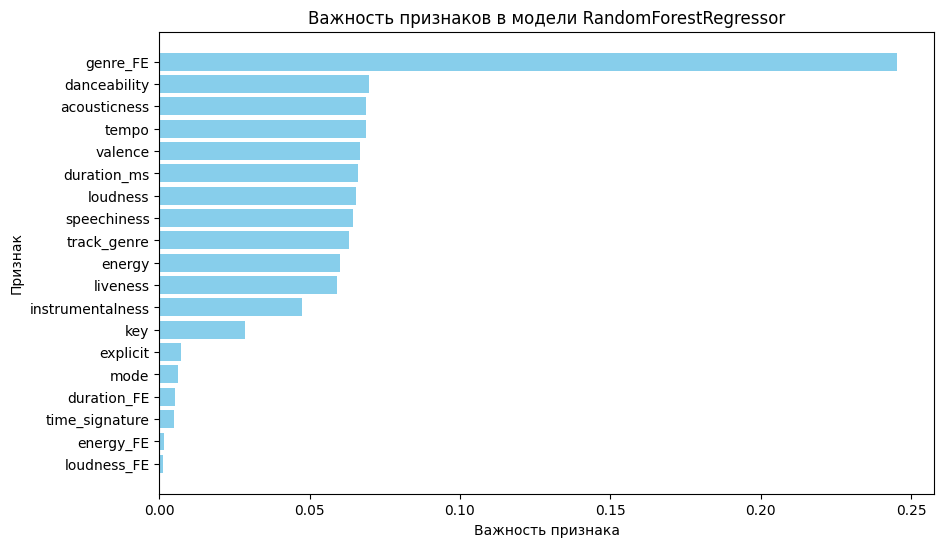

In [70]:
# Получение важности признаков
importances = model.feature_importances_

# Создание DataFrame для визуализации
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Сортировка признаков по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков в модели RandomForestRegressor')
plt.gca().invert_yaxis()
plt.show()

<h3>Анализ важности признаков в модели RandomForestRegressor</h3>


<ul> <li><strong>Наиболее важный признак:</strong> <ul> <li><strong>genre_FE:</strong> Этот признак имеет наибольшую важность, что указывает на то, что жанр музыки является ключевым фактором для предсказаний модели.</li> </ul> 

</li> <li><strong>Второстепенные признаки:</strong> <ul> <li><strong>danceability:</strong> Важность этого признака указывает на то, что танцевальность музыки также играет значительную роль в предсказаниях.</li> <li><strong>acousticness:</strong> Акустичность музыки также важна для модели.</li> <li><strong>tempo:</strong> Темп музыки имеет значительное влияние на предсказания.</li> <li><strong>valence:</strong> Эмоциональная окраска музыки (позитивная или негативная) также важна.</li> <li><strong>duration_ms:</strong> Продолжительность трека в миллисекундах имеет определенное значение.</li> <li><strong>loudness:</strong> Громкость музыки также влияет на предсказания.</li> </ul> </li> <li><strong>Менее важные признаки:</strong> <ul> <li><strong>speechiness:</strong> Наличие речи в музыке имеет меньшую важность.</li> <li><strong>track_genre:</strong> Жанр трека имеет меньшее значение по сравнению с genre_FE.</li> <li><strong>energy:</strong> Энергичность музыки также менее важна.</li> <li><strong>liveness:</strong> "Живое" звучание музыки имеет небольшое значение.</li> <li><strong>instrumentalness:</strong> Инструментальность музыки имеет низкую важность.</li> <li><strong>key:</strong> Тональность музыки имеет минимальное значение.</li> <li><strong>explicit:</strong> Наличие явного контента имеет очень низкую важность.</li> <li><strong>mode:</strong> Мажорный или минорный лад музыки имеет минимальное значение.</li> <li><strong>duration_FE:</strong> Продолжительность трека в другом формате имеет низкую важность.</li> <li><strong>time_signature:</strong> Размер музыки имеет минимальное значение.</li> <li><strong>energy_FE:</strong> Энергичность музыки в другом формате имеет низкую важность.</li> <li><strong>loudness_FE:</strong> Громкость музыки в другом формате имеет минимальное значение.</li> </ul> </li> </ul>
<strong>Общие выводы:</strong>

<ul> <li>Модель RandomForestRegressor сильно зависит от признака <strong>genre_FE</strong>, что указывает на то, что жанр музыки является наиболее важным фактором для предсказаний.</li> <li>Признаки, связанные с танцевальностью, акустичностью, темпом, эмоциональной окраской и продолжительностью трека, также имеют значительное влияние на модель.</li> <li>Менее важные признаки, такие как наличие речи, энергичность, инструментальность и тональность, имеют меньшее значение для модели.</li>

<li>Для улучшения показаний метрик можно усиленить внимание на наиболее важные признаки, такие как <strong>genre_FE</strong>, <strong>danceability</strong> и <strong>acousticness</strong>.</li> <li>Также можно удалить или объединить менее важные признаки, таких как <strong>explicit</strong>, <strong>mode</strong> и <strong>time_signature</strong>.</li>

### Попытки улучшить модель:

In [64]:
# больше параметров
model = RandomForestRegressor(
    n_estimators=100, # Количество деревьев в лесу
    max_depth=10, # Максимальная глубина дерева
    min_samples_split=2, # Минимальное количество образцов для разделения узла
    min_samples_leaf=1, # Минимальное количество образцов в листе
    random_state=42
    )


# обучение 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_pred, y_test)

print('результаты модели')
print(f'MAE: {mae}')
print(f"MSE: {mse}")
print(f'RMSE: {rmse}')
print(f"mape: {mape}")
print()

результаты модели
MAE: 13.525113866981942
MSE: 338.5067381319175
RMSE: 18.39855260970051
mape: 0.4696547118263116



<h3>Сравнение метрик:</h3>

<ul> <li><strong>MSE (Mean Squared Error):</strong> <ul> <li>Исходная модель: 280.65</li> <li>Улучшенная модель: 338.51</li> <li>MSE увеличилась, что указывает на ухудшение качества модели в среднем.</li> </ul> </li> <li><strong>RMSE (Root Mean Squared Error):</strong> <ul> <li>Исходная модель: 16.75</li> <li>Улучшенная модель: 18.40</li> <li>RMSE увеличилась, что также указывает на ухудшение качества модели.</li> </ul> </li> <li><strong>MAE (Mean Absolute Error):</strong> <ul> <li>Исходная модель: 12.01</li> <li>Улучшенная модель: 13.53</li> <li>MAE увеличилась, что указывает на увеличение средней абсолютной ошибки предсказаний.</li> </ul> </li> <li><strong>MAPE (Mean Absolute Percentage Error):</strong> <ul> <li>Исходная модель: 0.467</li> <li>Улучшенная модель: 0.470</li> <li>MAPE немного увеличилась, что указывает на небольшое ухудшение процентной ошибки предсказаний.</li> </ul> </li> </ul>
<h5>Общий вывод:</h5>

<ul> <li>Улучшенная модель показала худшие результаты по всем метрикам по сравнению с исходной моделью. Это указывает на то, что внесенные изменения не привели к улучшению производительности модели.</li></ul>

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Инициализация модели RandomForestRegressor с дополнительными параметрами
model = RandomForestRegressor(
    n_estimators=200,  # увеличено на 100 (по отношению с предыдущей моделью)
    max_depth=20,  # уменьшено на 10 (по отношению с предыдущей моделью)
    min_samples_split=5,  # увеличено на 3 (по отношению с предыдущей моделью)
    min_samples_leaf=2,  # уменьшено на 1 (по отношению с предыдущей моделью)
    bootstrap=True,  # Использование бутстрэпа
    max_samples=None,  # Максимальное количество образцов для обучения каждого базового эстиматора
    oob_score=True,  # Использование внеочередной оценки
    random_state=42 
)

# Обучение модели на обучающих данных
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вычисление метрик для оценки качества модели
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_pred, y_test)

# Вывод метрик
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

MSE: 288.36605727900775
RMSE: 16.9813443896238
MAE: 12.285158790951435
MAPE: 0.4546877700691853


<strong>Сравнение метрик:</strong>

<ul> <li><strong>MSE (Mean Squared Error):</strong> <ul> <li>Исходная модель: 280.65</li> <li>Улучшенная модель: 288.37</li> <li>MSE немного увеличилась, что указывает на небольшое ухудшение качества модели в среднем.</li> </ul> </li> <li><strong>RMSE (Root Mean Squared Error):</strong> <ul> <li>Исходная модель: 16.75</li> <li>Улучшенная модель: 16.98</li> <li>RMSE немного увеличилась, что также указывает на небольшое ухудшение качества модели.</li> </ul> </li> <li><strong>MAE (Mean Absolute Error):</strong> <ul> <li>Исходная модель: 12.01</li> <li>Улучшенная модель: 12.29</li> <li>MAE немного увеличилась, что указывает на небольшое увеличение средней абсолютной ошибки предсказаний.</li> </ul> </li> <li><strong>MAPE (Mean Absolute Percentage Error):</strong> <ul> <li>Исходная модель: 0.467</li> <li>Улучшенная модель: 0.455</li> <li>MAPE немного уменьшилась, что указывает на небольшое улучшение процентной ошибки предсказаний.</li> </ul> </li> </ul>
<h5>Общий вывод:</h5>

<ul> <li>Улучшенная модель показала небольшое ухудшение по метрикам MSE, RMSE и MAE по сравнению с исходной моделью.</li> <li>Однако, улучшенная модель показала небольшое улучшение по метрике MAPE, что указывает на улучшение процентной ошибки предсказаний.</li></ul>

### Кросс-валидация лучшей модели

In [72]:
# # инициализации и обучение лучшей модели RandomForestRegressor
# model = RandomForestRegressor()


# # Создание KFold для кросс-валидации с 5 фолдами
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Проведение кросс-валидации для MSE
# scores_mse = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
# mse = -scores_mse.mean() 
# rmse = mse ** 0.5

# # Проведение кросс-валидации для MAE
# scores_mae = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
# mae = -scores_mae.mean()



# print('кросс-валидация')
# print(f'MAE: {mae}')
# print(f'MSE: {mse}')
# print(f'RMSE: {rmse}')


from sklearn.model_selection import KFold, cross_validate

# Инициализация и обучение лучшей модели RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)  # Использование всех доступных ядер процессора для ускорения

# Создание KFold для кросс-валидации с 5 фолдами
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Проведение кросс-валидации для MSE и MAE одновременно
scoring = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_mean_absolute_error': 'neg_mean_absolute_error'
}

scores = cross_validate(model, X, y, cv=kf, scoring=scoring, n_jobs=-1)

# Вычисление средних значений MSE и MAE
mse = -scores['test_neg_mean_squared_error'].mean()
rmse = mse ** 0.5
mae = -scores['test_neg_mean_absolute_error'].mean()

print('Кросс-валидация')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

Кросс-валидация
MAE: 10.798708245784402
MSE: 259.06609578886867
RMSE: 16.095530304679887


<strong>Сравнение метрик:</strong>

<ul> <li><strong>MSE (Mean Squared Error):</strong> <ul> <li>Исходная модель: 280.65</li> <li>Кросс-валидация: 259.07</li> <li>MSE уменьшилась, что указывает на улучшение качества модели в среднем при кросс-валидации.</li> </ul> </li> <li><strong>RMSE (Root Mean Squared Error):</strong> <ul> <li>Исходная модель: 16.75</li> <li>Кросс-валидация: 16.09</li> <li>RMSE уменьшилась, что также указывает на улучшение качества модели при кросс-валидации.</li> </ul> </li> <li><strong>MAE (Mean Absolute Error):</strong> <ul> <li>Исходная модель: 12.01</li> <li>Кросс-валидация: 10.80</li> <li>MAE уменьшилась, что указывает на уменьшение средней абсолютной ошибки предсказаний при кросс-валидации.</li> </ul> </li> <li><strong>MAPE (Mean Absolute Percentage Error):</strong> <ul> <li>Исходная модель: 0.467</li> <li>MAPE не была рассчитана при кросс-валидации, поэтому сравнение невозможно. Однако, улучшение других метрик может указывать на общее улучшение модели.</li> </ul> </li> </ul>
<h3>Общий вывод:</h3>

<ul> <li>Модель показала улучшение по метрикам MSE, RMSE и MAE при кросс-валидации по сравнению с исходной моделью.</li> <li>Это указывает на то, что модель более устойчива и показывает лучшие результаты на различных подмножествах данных.</li> <li>Возможно, модель хорошо обобщает данные и не переобучается.</li></ul>

### <h3>Выводы:</h3>


<ul> <li> 
<h2>Производительность модели:</h2> <p>Модель показывает умеренную точность на обучающем наборе с MAE около 12.007 и RMSE около 16.752. Однако, MAPE в 46.742% указывает на значительные процентные отклонения предсказаний от истинных значений. Это может свидетельствовать о том, что модель хорошо справляется с большинством предсказаний, но есть случаи, где ошибки значительны.</p> </li>
<li> 

<h2>Стабильность модели:</h2> 
<p>Результаты кросс-валидации показывают, что модель не переобучается и демонстрирует стабильную производительность на различных разбиениях данных. MSE и RMSE при кросс-валидации ниже, чем на обучающем наборе, что является положительным признаком. Это указывает на то, что модель хорошо обобщает данные и может быть надежно использована для предсказаний на новых данных.</p> 
</li> 
<li> 

<h2>Улучшение модели:</h2> 
<p>Для улучшения модели можно рассмотреть следующие шаги:</p> 
<ul> 

<li>
<strong>Оптимизация гиперпараметров:</strong> 
Использование методов, таких как Grid Search или Random Search, для настройки гиперпараметров модели. Это может помочь найти оптимальные настройки, которые улучшат производительность модели.</li> 
<li>
<strong>Использование более сложных моделей:</strong> 
Рассмотрение более сложных алгоритмов машинного обучения, таких как XGBoost или LightGBM, которые могут лучше захватывать закономерности в данных.</li> 
<li>
<strong>Удаление менее важных признаков:</strong> 
Использование важности признаков для удаления менее значимых признаков, что может улучшить производительность модели.
</li></ul> 

<li> 
<h2>Заключение:</h2> 
<p>RandomForestRegressor показал хорошие результаты как на обучающем наборе, так и при кросс-валидации. Однако, есть потенциал для дальнейшего улучшения модели. </p> 
</li> 
</ul>